In [1]:
# Support for maths
import numpy as np
# Plotting tools
from matplotlib import pyplot as plt
# we use the following for plotting figures in jupyter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# GPy: Gaussian processes library
import GPy

In [2]:
def loadData(df):
    data = np.loadtxt(df)
    Xraw = data[:,:-1]
    # The regression task is to predict the residuary resistance per unit weight of displacement
    yraw = (data[:,-1])[:, None]
    X = (Xraw-Xraw.mean(axis=0))/np.std(Xraw, axis=0)
    y = (yraw-yraw.mean(axis=0))/np.std(yraw, axis=0)

    ind = range(X.shape[0])
    test_ind = ind[0::4] # take every fourth observation for the test set
    train_ind = list(set(ind)-set(test_ind))
    X_test = X[test_ind]
    X_train = X[train_ind]
    y_test = y[test_ind]
    y_train = y[train_ind]

    return X_train, y_train, X_test, y_test

In [3]:
# Create a 1-D RBF kernel with default parameters
k = GPy.kern.RBF(1)
# Preview the kernel's parameters
k

rbf.,value,constraints,priors
variance,1.0,+ve,
lengthscale,1.0,+ve,


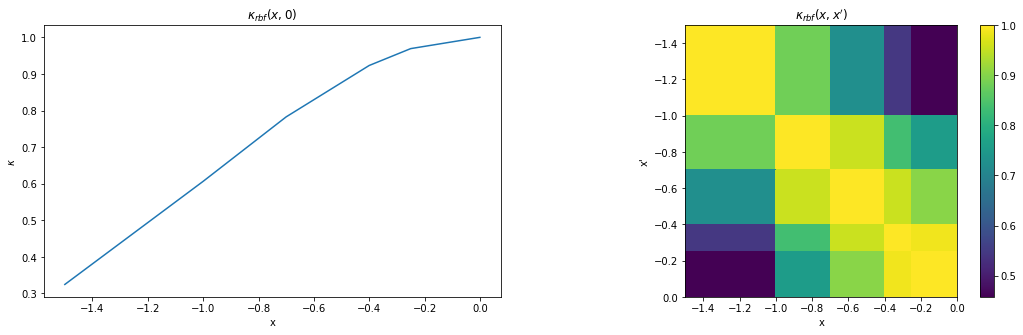

In [4]:
# Our sample space: 100 samples in the interval [-4,4]
X = np.array([-1.50,-1.00,-0.7,-0.40, -0.25, 0.00]).reshape(-1,1) # we need [:, None] to reshape X into a column vector for use in GPy

# Set up the plotting environment
plt.figure(figsize=(18,5))

# ==== k(x,0)

plt.subplot(121) # left plot

# First, sample kernel at x' = 0
K = k.K(X, np.array([[0.]])) # k(x,0)

# Plot covariance vector
plt.plot(X,K)

# Annotate plot
plt.xlabel("x"), plt.ylabel("$\kappa$")
plt.title("$\kappa_{rbf}(x,0)$")

# ==== k(x,x')

plt.subplot(122) # right plot

# The kernel takes two inputs, and outputs the covariance between each respective point in the two inputs
K = k.K(X,X)

# Plot the covariance of the sample space
plt.pcolor(X.T, X, K)

# Format and annotate plot
plt.gca().invert_yaxis(), plt.gca().axis("image")
plt.xlabel("x"), plt.ylabel("x'"), plt.colorbar()
plt.title("$\kappa_{rbf}(x,x')$");

In [5]:
[i for i in range(20)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]